This notebook is in order to clean and analyze the data we got for a project in our statistics class. Our project uses the data from a survey we gave to everyone in our class asking what brand of shoes they prefer. We had to clean this data due to multiple responses from the same people. Then we got national data on where people buy shoes from https://footwearnews.com/2018/business/trends/shoe-brands-teens-nike-vans-adidas-athleisure-streetwear-1202548339/ . We also have to reformat and clean this data to represent what pair of shoes people are wearing in order to compare it with our survey data.


first I'm going to load our survey data in order to clean it

In [23]:
import pandas as pd
surveydata = pd.read_csv('survey_data')
surveydata.head()

,Timestamp,Email Address,What brand of shoes do you wear?
0,9/8/2021 12:51:35,samanthai2193@mytusd.org,Nike
1,9/8/2021 12:52:50,cadens4924@mytusd.org,Vans
2,9/8/2021 12:53:05,jacks1894@mytusd.org,Vans
3,9/8/2021 12:53:08,asaela2031@mytusd.org,Converse
4,9/8/2021 12:53:10,keyannat5319@mytusd.org,Nike


Then I'm going to drop the timestamp column as that isn't relevant to what we want to know.

In [24]:
surveydata = surveydata.drop(['Timestamp'], axis=1)
surveydata.head()

,Email Address,What brand of shoes do you wear?
0,samanthai2193@mytusd.org,Nike
1,cadens4924@mytusd.org,Vans
2,jacks1894@mytusd.org,Vans
3,asaela2031@mytusd.org,Converse
4,keyannat5319@mytusd.org,Nike


then I'm going to drop the completely duplicate responses

In [28]:
surveydata = surveydata.drop_duplicates()
surveydata.tail(7)

,Email Address,What brand of shoes do you wear?
31,piercej6041@mytusd.org,Converse
32,damianw3589@mytusd.org,Converse
33,damianw3589@mytusd.org,Nike
36,brookeh2080@mytusd.org,Vans
37,christophery4346@mytusd.org,K2
39,hadya4394@mytusd.org,Nike
40,jrichardson@mytusd.org,Vans


Then I finally counted the values of what shoes people in our period prefer

In [45]:
shoedata = surveydata.drop(['Email Address'], axis=1)
shoedata.value_counts()

What brand of shoes do you wear?
Nike                                11
Vans                                10
Converse                             8
Adidas                               1
K2                                   1
dtype: int64

then I made a waffle chart to visualize the survey data

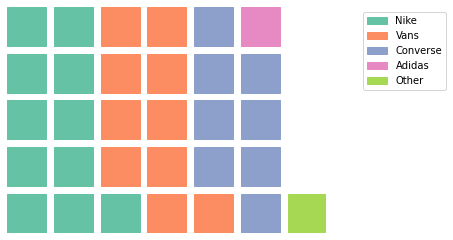

In [38]:
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install pywaffle
from pywaffle import Waffle


chartdata = {'Nike': 11, 'Vans': 10, 'Converse': 8, 'Adidas': 1, 'Other': 1}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=chartdata, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

then I calculated the percentages of the shoe data to compare it with our national data

In [52]:
percentages = pd.DataFrame([chartdata])
percentages = percentages.T
percentages.columns=['responses']
percentages['percentage'] = percentages['responses']/31
percentages

,responses,percentage
Nike,11,0.354839
Vans,10,0.322581
Converse,8,0.258065
Adidas,1,0.032258
Other,1,0.032258


Next I have to reformat the data from the national data (https://footwearnews.com/2018/business/trends/shoe-brands-teens-nike-vans-adidas-athleisure-streetwear-1202548339/) in order to compare it to our survey data.

I took the Top Footwear brands among upper income table and removed footlocker, nordstrom and DSW from the list since they are retailers who sell a variety of shoes brands. Then I lumped everything other than Nike, Vans, Converse, and Adidas into the other group to match out survey. Finally I recalculated the percentages based off this criteria to compare our survey data to.

In [55]:
42+16+14+4+3+3+2+1+1+1

87

there is already an implied 13% other group from the table that isn't explicity shown

I lumped steve madden, new balance, and sperry into the other group adding their percentages

In [56]:
13+1+1+3

18

finally the percentages are 42% nike, 16% vans, 14% adidas, 4% converse, and 18% other before redistributing the percentages allocated to general retailers

In [57]:
42+16+14+4+18

94

The 6% allocated to retailers is redistributed proportionally to the percentages above

In [81]:
def normperc(x):
    return x*1.0638
normperc(42)+normperc(16)+normperc(14)+normperc(4)+normperc(18)

99.99720000000002

now that the national data is normalized all thats left is to show the percentage results in a table

In [84]:
nationaldata = {'Nike': normperc(42), 'Vans': normperc(16), 'Converse': normperc(4), 'Adidas': normperc(14), 'Other': normperc(18)}
nationaldatadf = pd.DataFrame([nationaldata])
nationaldatadf

,Nike,Vans,Converse,Adidas,Other
0,44.6796,17.0208,4.2552,14.8932,19.1484


and thats how we cleaned our data